# NFL Betting Prop Analyzer

_Authors: Zane Habib_

---

## Sports-betting Industry

> The gambling industry has been ever-growing ever since legal sportsbetting came to fruition. One type of bet that many people take is a proposition bet, meaning how likely or not is this proposed bet going to hit. The proposition bet I am going to target specifically is how likely is it that Player X will cover the proposed QB bet (completions) and what variables that we know beforehand like spread, over/under, weather make an impact. I have found a data set on kaggle that provides historical betting information on each game. I then merged prop bet information on those specific games.

**Possible Areas to Examine**

- How does the team you are playing affect whether a player is going to cover a bet?
- How does the over/under on the amount of points estimated to be scored in the game affect whether a player is going to cover a bet?
- How does Home/Away affect whether a player is going to cover a bet?
- How does career averages affect whether a player is going to cover a bet?

Historical betting stats Kaggle [Download Here](https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data)

Prop Betting Lines 

https://propbets.football/player-stats/quarterback-results/

## Learning Objectives

- **EDA** Perform Exploratory Data Analysis to provide statistical analysis, along with any visualizations.
- **Model** Develop a prototype model or process to successfully resolve the business problem
- **Examine** Summarize and break down problem, approach, and recommendations in a manner that different levels of expertise will find informative and persuasive.

In [2]:
# Import necesarry libraries into project
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
import requests
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [3]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="reading-files"></a>
### Reading NFL Betting Lines Data and Prop Betting Data

In [4]:
filepath = 'data/Full_Betting_Data.csv'
Lines_DF = pd.read_csv(filepath, parse_dates=True)

In [5]:
filepath = 'data/Prop_Betting_Data.csv'
Prop_DF = pd.read_csv(filepath, parse_dates=True)

In [6]:
filepath = 'data/nfl_teams.csv'
teams = pd.read_csv(filepath, parse_dates=True)

**Examine both Dataframes**

In [7]:
type(Lines_DF) 

pandas.core.frame.DataFrame

In [8]:
type(Prop_DF) 

pandas.core.frame.DataFrame

In [9]:
# print the first 5 rows
Lines_DF.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/7/17,2017,1,False,New England Patriots,Kansas City Chiefs,NE,-9.0,48.5,Gillette Stadium,False,63,7,NaN,NaN
1,9/10/17,2017,1,False,Buffalo Bills,New York Jets,BUF,-9.5,40.0,New Era Field,False,61,5,NaN,NaN
2,9/10/17,2017,1,False,Chicago Bears,Atlanta Falcons,ATL,-7.0,49.5,Soldier Field,False,66,9,NaN,NaN
3,9/10/17,2017,1,False,Cincinnati Bengals,Baltimore Ravens,CIN,-3.0,42.5,Paul Brown Stadium,False,71,8,NaN,NaN
4,9/10/17,2017,1,False,Cleveland Browns,Pittsburgh Steelers,PIT,-9.0,47.0,FirstEnergy Stadium,False,67,9,NaN,NaN


In [10]:
# print the first 5 rows
Prop_DF.head()

,Player,Event,Team,Opp,H/A,Line,Res,Over,W/L/P_O,Under,W/L/P_U,Week
0,Andrew Luck,Completions,IND,TEN,Away,25.5,24,-115,Loss,-115,Win,18NFL17
1,Ben Roethlisberger,Completions,PIT,CIN,Home,26.5,31,-115,Win,-115,Loss,18NFL17
2,Blake Bortles,Completions,JAC,HOU,Away,19.5,15,-115,Loss,-115,Win,18NFL17
3,Deshaun Watson,Completions,HOU,JAC,Home,20.5,25,-115,Win,-115,Loss,18NFL17
4,Jeff Driskel,Completions,CIN,PIT,Away,20.5,12,-115,Loss,-115,Win,18NFL17


In [11]:
# column names
Lines_DF.columns           

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'team_away', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'stadium', 'stadium_neutral', 'weather_temperature',
       'weather_wind_mph', 'weather_humidity', 'weather_detail'],
      dtype='object')

In [12]:
# column names
Prop_DF.columns 

Index(['Player', 'Event', 'Team', 'Opp', 'H/A', 'Line', 'Res', 'Over',
       'W/L/P_O', 'Under', 'W/L/P_U', 'Week'],
      dtype='object')

In [13]:
# data types of each column
Lines_DF.dtypes

schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line        float64
stadium                 object
stadium_neutral           bool
weather_temperature      int64
weather_wind_mph         int64
weather_humidity       float64
weather_detail          object
dtype: object

In [14]:
# data types of each column
Prop_DF.dtypes

Player      object
Event       object
Team        object
Opp         object
H/A         object
Line       float64
Res          int64
Over         int64
W/L/P_O     object
Under        int64
W/L/P_U     object
Week        object
dtype: object

In [15]:
# number of rows and columns
Lines_DF.shape

(523, 15)

In [16]:
# number of rows and columns
Prop_DF.shape

(958, 12)

In [17]:
# concise summary (including memory usage)
Lines_DF.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 15 columns):
schedule_date          523 non-null object
schedule_season        523 non-null int64
schedule_week          523 non-null object
schedule_playoff       523 non-null bool
team_home              523 non-null object
team_away              523 non-null object
team_favorite_id       523 non-null object
spread_favorite        523 non-null float64
over_under_line        523 non-null float64
stadium                523 non-null object
stadium_neutral        523 non-null bool
weather_temperature    523 non-null int64
weather_wind_mph       523 non-null int64
weather_humidity       0 non-null float64
weather_detail         168 non-null object
dtypes: bool(2), float64(3), int64(3), object(7)
memory usage: 54.2+ KB


In [18]:
# concise summary (including memory usage)
Prop_DF.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 12 columns):
Player     958 non-null object
Event      958 non-null object
Team       958 non-null object
Opp        958 non-null object
H/A        958 non-null object
Line       958 non-null float64
Res        958 non-null int64
Over       958 non-null int64
W/L/P_O    958 non-null object
Under      958 non-null int64
W/L/P_U    958 non-null object
Week       958 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 89.9+ KB


In [19]:
#check for any null values
Lines_DF.isnull().sum()

schedule_date            0
schedule_season          0
schedule_week            0
schedule_playoff         0
team_home                0
team_away                0
team_favorite_id         0
spread_favorite          0
over_under_line          0
stadium                  0
stadium_neutral          0
weather_temperature      0
weather_wind_mph         0
weather_humidity       523
weather_detail         355
dtype: int64

In [20]:
#check for any null values
Prop_DF.isnull().sum()

Player     0
Event      0
Team       0
Opp        0
H/A        0
Line       0
Res        0
Over       0
W/L/P_O    0
Under      0
W/L/P_U    0
Week       0
dtype: int64

No Null Values in either Dataframe except for 2 weather columns that can be dropped

In [21]:
Lines_DF.head(1)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/7/17,2017,1,False,New England Patriots,Kansas City Chiefs,NE,-9.0,48.5,Gillette Stadium,False,63,7,NaN,NaN


In [22]:
Prop_DF.tail(1)

,Player,Event,Team,Opp,H/A,Line,Res,Over,W/L/P_O,Under,W/L/P_U,Week
957,Tyrod Taylor,Completions,BUF,NYJ,Home,17.5,16,-115,Loss,-115,Win,17NFL01


In [23]:
# Create mutual Week column for merging purposes

#Extract year from date column
Year = Lines_DF.schedule_date.str.split('/').apply(lambda x: x[2])

#Pad week with 0 if not 2 characters
#Need to change object from Series to string to correctly pull length of characters

SCH = np.where(Lines_DF.schedule_week.astype(str).map(len) != 2, '0' + Lines_DF.schedule_week, Lines_DF.schedule_week)
    
#Finish Concatenating Week

Week = Year + 'NFL' + SCH
    
Lines_DF['Week'] = Week
Lines_DF.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,Week
0,9/7/17,2017,1,False,New England Patriots,Kansas City Chiefs,NE,-9.0,48.5,Gillette Stadium,False,63,7,NaN,NaN,17NFL01
1,9/10/17,2017,1,False,Buffalo Bills,New York Jets,BUF,-9.5,40.0,New Era Field,False,61,5,NaN,NaN,17NFL01
2,9/10/17,2017,1,False,Chicago Bears,Atlanta Falcons,ATL,-7.0,49.5,Soldier Field,False,66,9,NaN,NaN,17NFL01
3,9/10/17,2017,1,False,Cincinnati Bengals,Baltimore Ravens,CIN,-3.0,42.5,Paul Brown Stadium,False,71,8,NaN,NaN,17NFL01
4,9/10/17,2017,1,False,Cleveland Browns,Pittsburgh Steelers,PIT,-9.0,47.0,FirstEnergy Stadium,False,67,9,NaN,NaN,17NFL01


In [24]:
# Change Team Name to Team ID from teams dataframe
Lines_DF['team_home'] = Lines_DF.team_home.map(teams.set_index('team_name')['team_id'].to_dict())
Lines_DF['team_away'] = Lines_DF.team_away.map(teams.set_index('team_name')['team_id'].to_dict())
Lines_DF.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,Week
0,9/7/17,2017,1,False,NE,KC,NE,-9.0,48.5,Gillette Stadium,False,63,7,NaN,NaN,17NFL01
1,9/10/17,2017,1,False,BUF,NYJ,BUF,-9.5,40.0,New Era Field,False,61,5,NaN,NaN,17NFL01
2,9/10/17,2017,1,False,CHI,ATL,ATL,-7.0,49.5,Soldier Field,False,66,9,NaN,NaN,17NFL01
3,9/10/17,2017,1,False,CIN,BAL,CIN,-3.0,42.5,Paul Brown Stadium,False,71,8,NaN,NaN,17NFL01
4,9/10/17,2017,1,False,CLE,PIT,PIT,-9.0,47.0,FirstEnergy Stadium,False,67,9,NaN,NaN,17NFL01


In [25]:
# Create Function to set home/away to a binary column
def homeaway(row):
    if row['H/A'] == 'Home':
        val = 1
    else:
        val = 0
    return val

In [26]:
#Apply to Prop dataframe

Prop_DF['Home/Away'] = Prop_DF.apply(homeaway, axis=1)

In [27]:
#Create Column for home team

Prop_DF['Home_Team'] = np.where(Prop_DF['Home/Away']==1, Prop_DF.Team, Prop_DF.Opp)
Prop_DF.head()

,Player,Event,Team,Opp,H/A,Line,Res,Over,W/L/P_O,Under,W/L/P_U,Week,Home/Away,Home_Team
0,Andrew Luck,Completions,IND,TEN,Away,25.5,24,-115,Loss,-115,Win,18NFL17,0,TEN
1,Ben Roethlisberger,Completions,PIT,CIN,Home,26.5,31,-115,Win,-115,Loss,18NFL17,1,PIT
2,Blake Bortles,Completions,JAC,HOU,Away,19.5,15,-115,Loss,-115,Win,18NFL17,0,HOU
3,Deshaun Watson,Completions,HOU,JAC,Home,20.5,25,-115,Win,-115,Loss,18NFL17,1,HOU
4,Jeff Driskel,Completions,CIN,PIT,Away,20.5,12,-115,Loss,-115,Win,18NFL17,0,PIT


In [28]:
#Create common column to merge both dataframes

Prop_DF['Home_Week'] = Prop_DF.Home_Team + Prop_DF.Week

Lines_DF['Home_Week'] = Lines_DF.team_home + Lines_DF.Week

### Merge dataframes based on each game

In [29]:
all_data = pd.merge(Lines_DF,Prop_DF, on='Home_Week')
all_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,895,896,897,898,899,900,901,902,903,904
schedule_date,9/7/17,9/7/17,9/10/17,9/10/17,9/10/17,9/10/17,9/10/17,9/10/17,9/10/17,9/10/17,...,12/30/18,12/30/18,12/30/18,12/30/18,12/30/18,12/30/18,12/30/18,12/30/18,12/30/18,12/30/18
schedule_season,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
schedule_week,1,1,1,1,1,1,1,1,1,1,...,17,17,17,17,17,17,17,17,17,17
schedule_playoff,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
team_home,NE,NE,BUF,BUF,CHI,CHI,CIN,CIN,CLE,CLE,...,HOU,KC,MIN,MIN,PIT,PIT,SEA,TEN,WAS,WAS
team_away,KC,KC,NYJ,NYJ,ATL,ATL,BAL,BAL,PIT,PIT,...,JAX,OAK,CHI,CHI,CIN,CIN,ARI,IND,PHI,PHI
team_favorite_id,NE,NE,BUF,BUF,ATL,ATL,CIN,CIN,PIT,PIT,...,HOU,KC,MIN,MIN,PIT,PIT,SEA,IND,PHI,PHI
spread_favorite,-9,-9,-9.5,-9.5,-7,-7,-3,-3,-9,-9,...,-7,-14.5,-6,-6,-14,-14,-14,-5.5,-6,-6
over_under_line,48.5,48.5,40,40,49.5,49.5,42.5,42.5,47,47,...,39.5,52.5,40.5,40.5,45,45,39.5,42.5,42.5,42.5
stadium,Gillette Stadium,Gillette Stadium,New Era Field,New Era Field,Soldier Field,Soldier Field,Paul Brown Stadium,Paul Brown Stadium,FirstEnergy Stadium,FirstEnergy Stadium,...,NRG Stadium,Arrowhead Stadium,U.S. Bank Stadium,U.S. Bank Stadium,Heinz Field,Heinz Field,CenturyLink Field,Nissan Stadium,FedEx Field,FedEx Field


Successfully combined both dataframes.

In [30]:
#Drop unused columns such as weather_detail
all_data.drop(['Home_Team', 'W/L/P_U', 'W/L/P_O', 'H/A', 'Team', 'Opp', 'Event', 'Home_Week', 'Week_x', 'Week_y', 'weather_detail',  'weather_humidity', 'schedule_season', 'schedule_date', 'schedule_playoff', 'stadium_neutral', 'stadium'], axis=1, inplace=True)
all_data.head()

,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,Player,Line,Res,Over,Under,Home/Away
0,1,NE,KC,NE,-9.0,48.5,63,7,Alex Smith,21.5,28,-140,110,0
1,1,NE,KC,NE,-9.0,48.5,63,7,Tom Brady,24.5,16,-130,100,1
2,1,BUF,NYJ,BUF,-9.5,40.0,61,5,Josh McCown,18.5,26,-115,-115,0
3,1,BUF,NYJ,BUF,-9.5,40.0,61,5,Tyrod Taylor,17.5,16,-115,-115,1
4,1,CHI,ATL,ATL,-7.0,49.5,66,9,Matt Ryan,23.5,21,-115,-115,0


DataFrame cleaned out

### Create columns to classify specific features that could prove to be important

- **Favorites** Being the favorite in a matchup could be a key identifier.
- **Spread** The bigger the spread the larger the final point differential could be. If its a small spread it'll be a closer game. How does this affect the outcome on a prop?
- **Win/Loss** How will we classify a win vs. loss in a function? Result is greater than proposed Line.

In [31]:
# Create column to set favorite as a binary column

all_data['Favorite'] = np.where(all_data['team_favorite_id']==all_data['team_home'], 1, 0)
all_data.head()

,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,Player,Line,Res,Over,Under,Home/Away,Favorite
0,1,NE,KC,NE,-9.0,48.5,63,7,Alex Smith,21.5,28,-140,110,0,1
1,1,NE,KC,NE,-9.0,48.5,63,7,Tom Brady,24.5,16,-130,100,1,1
2,1,BUF,NYJ,BUF,-9.5,40.0,61,5,Josh McCown,18.5,26,-115,-115,0,1
3,1,BUF,NYJ,BUF,-9.5,40.0,61,5,Tyrod Taylor,17.5,16,-115,-115,1,1
4,1,CHI,ATL,ATL,-7.0,49.5,66,9,Matt Ryan,23.5,21,-115,-115,0,0


In [32]:
#Remove negative sign from spread of game

all_data['Spread_Num'] = (all_data.spread_favorite) * (-1)

In [33]:
#Create function for win/loss of bet

def winloss(row):
    if row['Res'] < row['Line']:
        val = 0
    else:
        val = 1
    return val

In [34]:
#Apply to dataframe

all_data['winloss'] = all_data.apply(winloss, axis=1)
all_data.head()

,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,Player,Line,Res,Over,Under,Home/Away,Favorite,Spread_Num,winloss
0,1,NE,KC,NE,-9.0,48.5,63,7,Alex Smith,21.5,28,-140,110,0,1,9.0,1
1,1,NE,KC,NE,-9.0,48.5,63,7,Tom Brady,24.5,16,-130,100,1,1,9.0,0
2,1,BUF,NYJ,BUF,-9.5,40.0,61,5,Josh McCown,18.5,26,-115,-115,0,1,9.5,1
3,1,BUF,NYJ,BUF,-9.5,40.0,61,5,Tyrod Taylor,17.5,16,-115,-115,1,1,9.5,0
4,1,CHI,ATL,ATL,-7.0,49.5,66,9,Matt Ryan,23.5,21,-115,-115,0,0,7.0,0


### Visualizations to examine correlation

In [35]:
new_df = all_data.groupby('Player').mean()

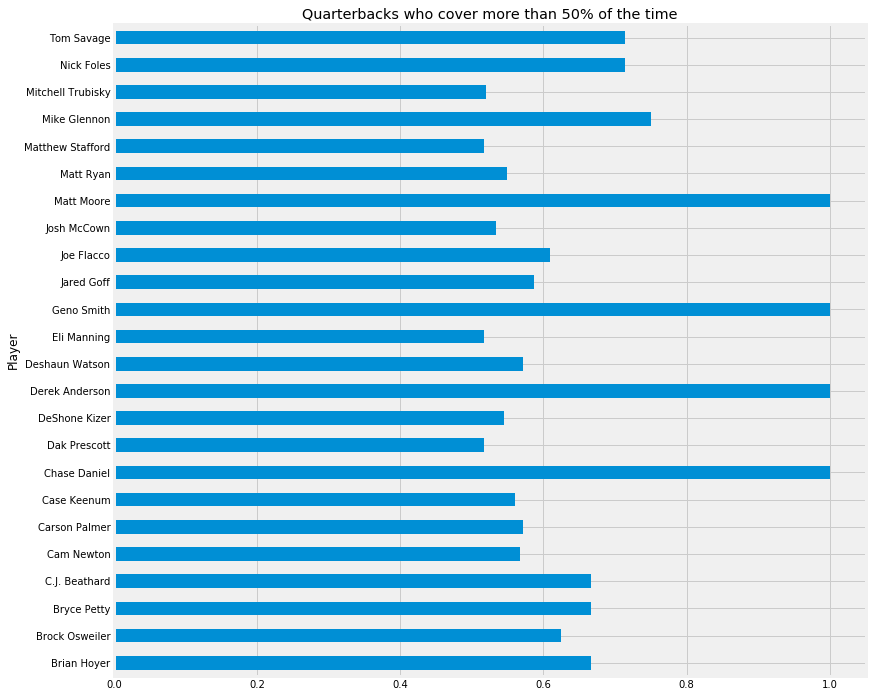

In [39]:
plt.title("Quarterbacks who cover more than 50% of the time")
new_df[new_df['winloss'] >.5]['winloss'].plot(kind='barh', figsize= (12,12));

In [37]:
team_df = all_data.groupby('team_home').mean()

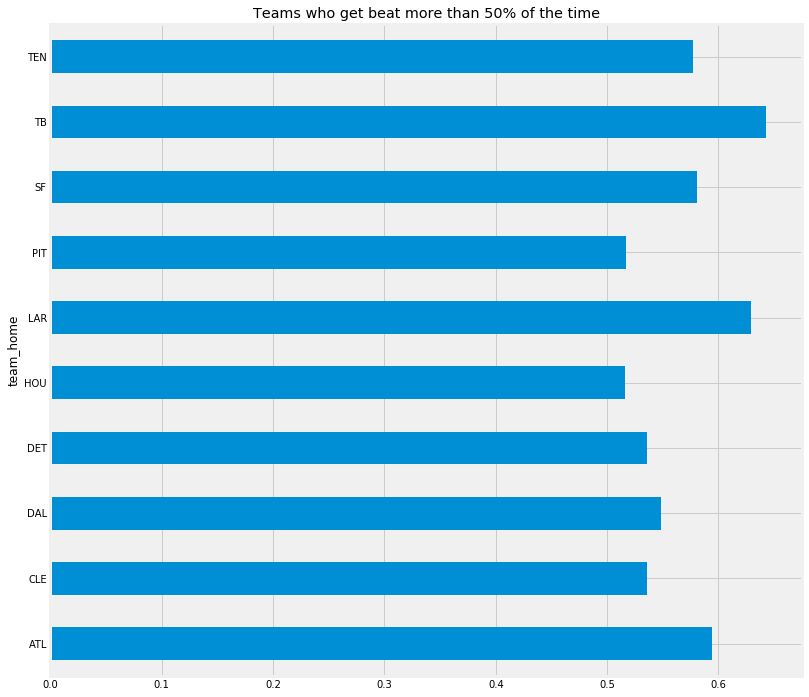

In [40]:
plt.title("Teams who get beat more than 50% of the time")
team_df[team_df['winloss'] >.5]['winloss'].plot(kind='barh', figsize= (12,12));

# Feature + Model Selection

Due to this being a yes or no answer (did they win the bet or did they not) we are only going to look at Classification models

### Feature selection using heatmap

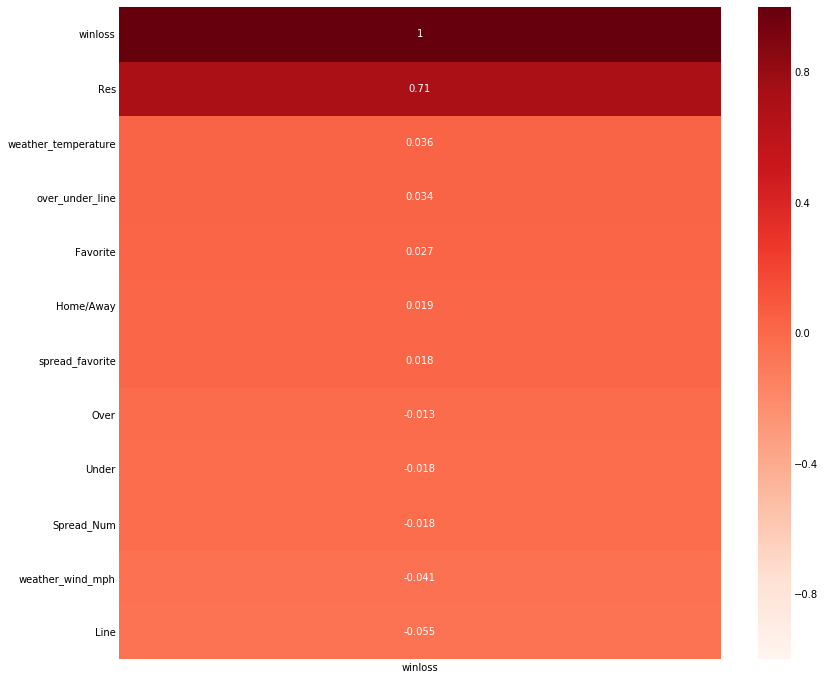

In [48]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(all_data.corr()[['winloss']].sort_values('winloss').tail(15),
 vmax=1, vmin=-1, cmap='Reds', annot=True, ax=ax);
ax.invert_yaxis()

It seems like temperature, over/under, Favorite, and Home/Away make the biggest impact.

### Building a Logistic Regression Model

#### Create Logistic Regression & Hyperparameter Search Space

In [53]:
# instantiate model
logreg = LogisticRegression()

# Create X and y.
feature_cols = ['over_under_line','weather_temperature','Favorite']
X = all_data[feature_cols]
y = all_data['winloss']

In [54]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

Create + Conduct Grid Search, and view Hyperparameter Values of Best Model

In [55]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1291.5496650148827


Train/Test/Split on Model and Scale Data

In [56]:
# fit a logistic regression model and store predictions
from sklearn.preprocessing import StandardScaler

# train/test/split and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)

#Scale Data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

y_pred = logreg.predict(X_test)
print('Accuracy of completion logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of completion logistic regression classifier on test set: 0.55


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[149   1]
 [122   0]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.99      0.71       150
           1       0.00      0.00      0.00       122

    accuracy                           0.55       272
   macro avg       0.27      0.50      0.35       272
weighted avg       0.30      0.55      0.39       272



### Import KNN and Instantiate a Model With One Neighbor

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=1 for KNN (the n_neighbors parameter)
# k = 1 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
cross_val_scores_n1 = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(cross_val_scores_n1)

[0.52747253 0.43956044 0.3956044  0.46153846 0.56043956 0.42222222
 0.41111111 0.43333333 0.46666667 0.37777778]


In [86]:
#Accuracy of cross validation scores with 5 n_neighbors
print(cross_val_scores_n1.mean())

0.4495726495726496


### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [87]:
k_range = range(1, 101)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [82]:
#Printing the accuracies
scores

{1: 0.4889705882352941,
 2: 0.5477941176470589,
 3: 0.5110294117647058,
 4: 0.5257352941176471,
 5: 0.49264705882352944,
 6: 0.5404411764705882,
 7: 0.5110294117647058,
 8: 0.5330882352941176,
 9: 0.4852941176470588,
 10: 0.49264705882352944,
 11: 0.5,
 12: 0.5294117647058824,
 13: 0.5,
 14: 0.5110294117647058,
 15: 0.5073529411764706,
 16: 0.48161764705882354,
 17: 0.5147058823529411,
 18: 0.5036764705882353,
 19: 0.5036764705882353,
 20: 0.4889705882352941,
 21: 0.5036764705882353,
 22: 0.5036764705882353,
 23: 0.4963235294117647,
 24: 0.4852941176470588,
 25: 0.4963235294117647,
 26: 0.5036764705882353,
 27: 0.4852941176470588,
 28: 0.5073529411764706,
 29: 0.5073529411764706,
 30: 0.5183823529411765,
 31: 0.5110294117647058,
 32: 0.5110294117647058,
 33: 0.5,
 34: 0.5073529411764706,
 35: 0.5036764705882353,
 36: 0.5183823529411765,
 37: 0.5073529411764706,
 38: 0.5330882352941176,
 39: 0.5036764705882353,
 40: 0.5294117647058824,
 41: 0.5110294117647058,
 42: 0.5220588235294118,
 

Best Score was 54.7%

### Random Forest with Grid Search

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [69]:
#Instantiate Classifier
RFmodel = RandomForestClassifier()

In [70]:
#Create Parameter Grid
param_grid = {'max_depth' : [2,4,6,8,10],
              'min_samples_split' : [2,4,6,8,10]}

In [71]:
grid_search = GridSearchCV(RFmodel, param_grid, cv=5)

In [72]:
#Fit model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [119]:
grid_search.score(X_test,y_test)

0.5698529411764706

Random Forest Model fit best